<a href="https://colab.research.google.com/github/Batorejro/Machine-Learning-boot/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

#wczytanie danych
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()

print(f'Zbiór uczący: {X_train.shape}, zbiór walidacyjny: {X_val.shape}')

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Zbiór uczący: (60000, 28, 28), zbiór walidacyjny: (10000, 28, 28)


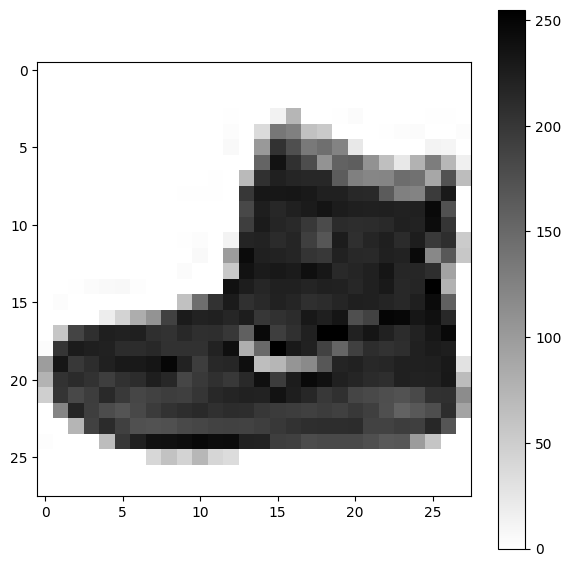

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

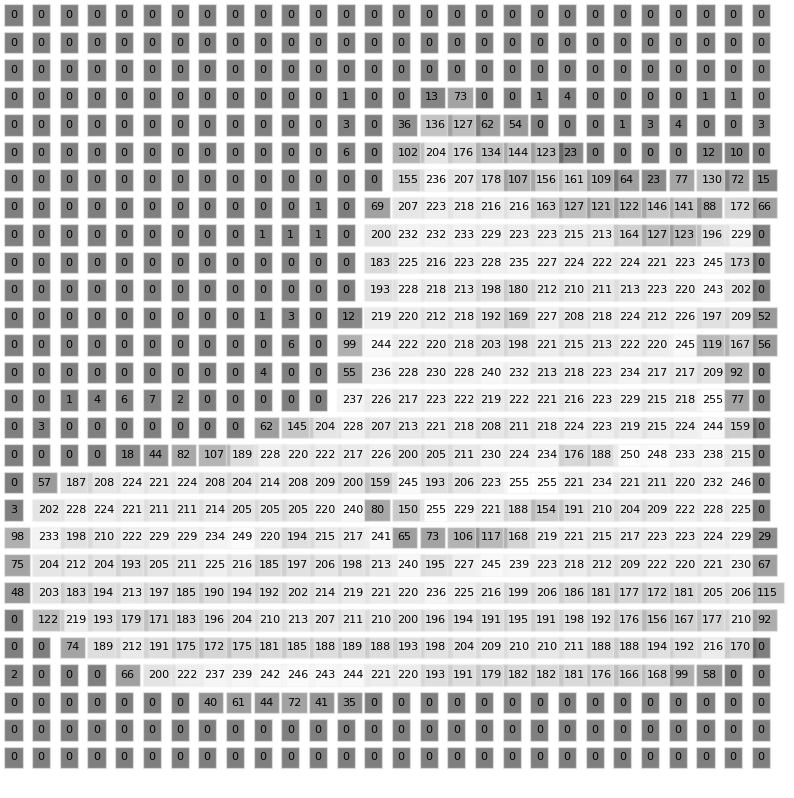

In [4]:
def plot_digit(digit, dem=28, font_size=8):
    max_ax = font_size * dem

    fig = plt.figure(figsize=(10,10))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')

    for idx in range(dem):
        for jdx in range(dem):
            t = plt.text(idx*font_size, max_ax - jdx*font_size,
                         digit[jdx][idx], fontsize=font_size,
                         color="#000000")
            c = digit[jdx][idx] / 255.
            t.set_bbox(dict(facecolor=(c, c, c), alpha=0.5,
                            edgecolor='#f1f1f1'))

    plt.show()

plot_digit(X_train[0])

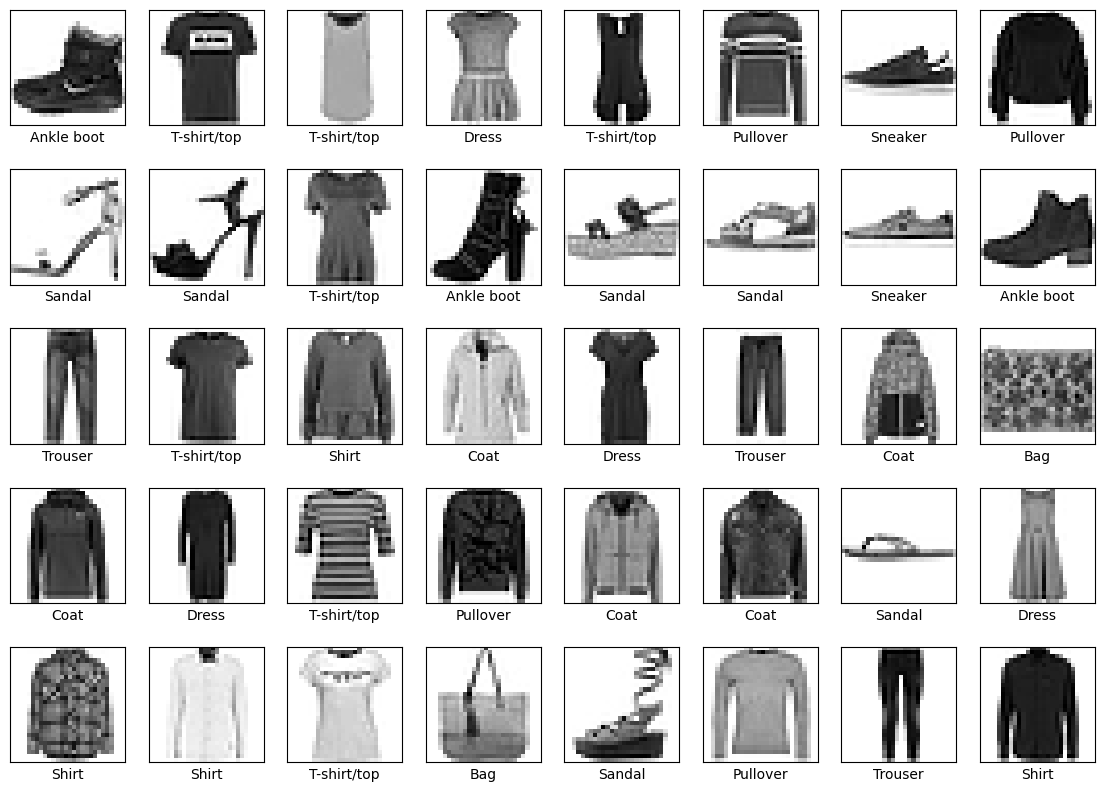

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(14,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, len(class_names))
y_val = to_categorical(y_val, len(class_names))

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [9]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [10]:
from tensorflow.keras.layers import Flatten, add

model.add(Flatten(input_shape=(28, 28)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
from tensorflow.keras.layers import Dense

model.add(Dense(128, activation='relu'))

Softmax

In [12]:
	model.add(Dense(10, activation = 'softmax'))

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
istory = model.fit(X_train,
                    y_train,
                    epochs=10,
                    verbose=1,
                    batch_size = 256,
                    validation_data = (X_val, y_val)
                   )

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7177 - loss: 0.8393 - val_accuracy: 0.8265 - val_loss: 0.4882
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8471 - loss: 0.4396 - val_accuracy: 0.8426 - val_loss: 0.4393
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8615 - loss: 0.3962 - val_accuracy: 0.8464 - val_loss: 0.4316
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8695 - loss: 0.3698 - val_accuracy: 0.8558 - val_loss: 0.4070
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8774 - loss: 0.3490 - val_accuracy: 0.8641 - val_loss: 0.3858
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8790 - loss: 0.3327 - val_accuracy: 0.8693 - val_loss: 0.3728
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8885 - loss: 0.3106 - val_accuracy: 0.8679 - val_loss: 0.3637
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8890 - loss: 0.3072 - val_accuracy: 0.

In [16]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    verbose=1,
                    batch_size = 256,
                    validation_split = 0.2
                   )

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8999 - loss: 0.2706 - val_accuracy: 0.9042 - val_loss: 0.2666
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9029 - loss: 0.2655 - val_accuracy: 0.8975 - val_loss: 0.2849
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9052 - loss: 0.2607 - val_accuracy: 0.8999 - val_loss: 0.2724
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9091 - loss: 0.2493 - val_accuracy: 0.8976 - val_loss: 0.2765
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9115 - loss: 0.2454 - val_accuracy: 0.8977 - val_loss: 0.2807
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9147 - loss: 0.2354 - val_accuracy: 0.9007 - val_loss: 0.2712
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9153 - loss: 0.2312 - val_accuracy: 0.8912 - val_loss: 0.2984
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9169 - loss: 0.2297 - val_accuracy: 0.

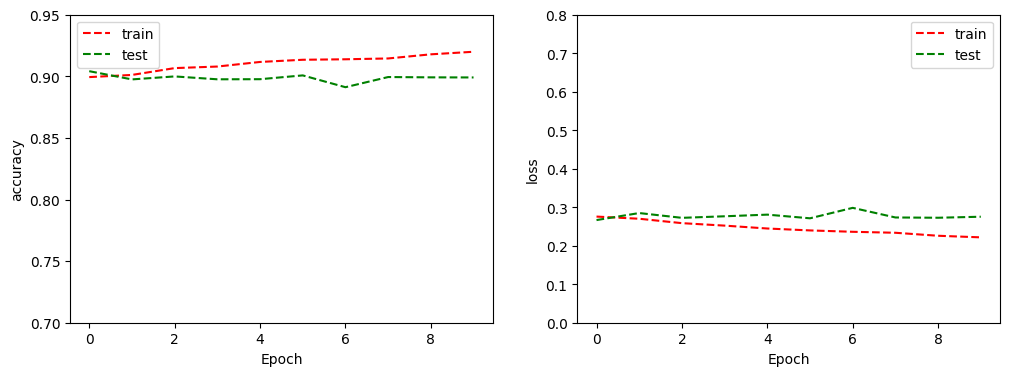

In [17]:
def draw_curves(history, key1='accuracy', ylim1=(0.8, 1.00),
                key2='loss', ylim2=(0.0, 1.0)):
    plt.figure(figsize=(12,4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history[key1], "r--")
    plt.plot(history.history['val_' + key1], "g--")
    plt.ylabel(key1)
    plt.xlabel('Epoch')
    plt.ylim(ylim1)
    plt.legend(['train', 'test'], loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(history.history[key2], "r--")
    plt.plot(history.history['val_' + key2], "g--")
    plt.ylabel(key2)
    plt.xlabel('Epoch')
    plt.ylim(ylim2)
    plt.legend(['train', 'test'], loc='best')

    plt.show()

draw_curves(history, key1='accuracy', ylim1=(0.7, 0.95),
            key2='loss', ylim2=(0.0, 0.8))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6010 - loss: 1.2157 - val_accuracy: 0.7877 - val_loss: 0.6366
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8083 - loss: 0.5852 - val_accuracy: 0.8127 - val_loss: 0.5537
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8263 - loss: 0.5204 - val_accuracy: 0.8238 - val_loss: 0.5211
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8359 - loss: 0.4863 - val_accuracy: 0.8282 - val_loss: 0.4998
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8447 - loss: 0.4656 - val_accuracy: 0.8330 - val_loss: 0.4859
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8464 - loss: 0.4566 - val_accuracy: 0.8358 - val_loss: 0.4772
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8491 - loss: 0.4472 - val_accuracy: 0.8381 - val_loss: 0.4702
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8515 - loss: 0.4363 - val_accuracy: 0.

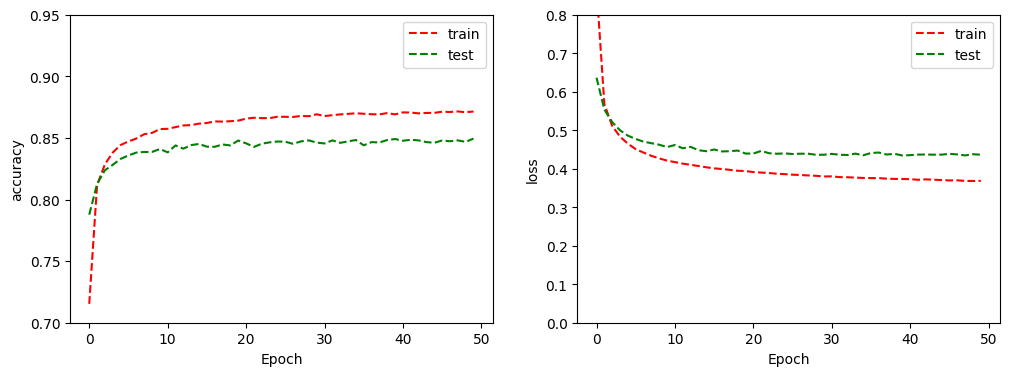

In [18]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation = 'softmax'))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(X_train,
                    y_train,
                    epochs=50,
                    verbose=1,
                    batch_size = 256,
                    validation_data = (X_val, y_val)
                   )

draw_curves(history2, key1='accuracy', ylim1=(0.7, 0.95),
            key2='loss', ylim2=(0.0, 0.8))

Predykcja

In [19]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
import matplotlib.pyplot as plt

def plot_value_img(index, predictions, actuals, images):

  img = images[index]
  pred = predictions[index]
  act = actuals[index]

  plt.imshow(img, cmap='gray')
  plt.title(f"Predicted: {pred}, Actual: {act}")
  plt.show()

In [20]:
plot_value_img(4, y_val_pred, y_val, X_val)

NameError: name 'plot_value_img' is not defined